In [ ]:
import kagglehub
path = kagglehub.dataset_download("datasnaek/youtube-new")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'youtube-new' dataset.
Path to dataset files: /kaggle/input/youtube-new


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Leer todos los archivos CSV y Limpieza de datos

In [ ]:
files = ["CAvideos.csv", "DEvideos.csv", "FRvideos.csv", "GBvideos.csv", "INvideos.csv", "JPvideos.csv", "KRvideos.csv", "MXvideos.csv", "RUvideos.csv", "USvideos.csv"]

folder_path  = "/kaggle/input/youtube-new"

data_dict = {}

for i, file in enumerate(files, start=1):
    file_path = os.path.join(folder_path, file)
    data_dict[f"data{i}"] = pd.read_csv(file_path, encoding="latin1")

In [ ]:
# Se genero un df para cada .csv (trbajaremos con el US y el CA)
dataCA = data_dict["data1"]
dataDE = data_dict["data2"]
dataFR = data_dict["data3"]
dataGB = data_dict["data4"]
dataIN = data_dict["data5"]
dataJP = data_dict["data6"]
dataKR = data_dict["data7"]
dataMX = data_dict["data8"]
dataRU = data_dict["data9"]
dataUS = data_dict["data10"]

In [ ]:
# Las categorias fueron sacadas de .json con un script de bash
category_dict = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}

In [ ]:
# Formateando la hora
dataUS["publish_time"] = pd.to_datetime(dataUS["publish_time"], utc=True).dt.tz_localize(None)
dataCA["publish_time"] = pd.to_datetime(dataCA["publish_time"], utc=True).dt.tz_localize(None)

## Vemos cuantas NaN hay tanto para EEUU y Canadá

In [ ]:
print("Mostrar NaN para Estados Unidos")
dataUS.isna().sum()

Mostrar NaN para Estados Unidos


,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


In [ ]:
print("Mostrar NaN para Canada")
dataCA.isna().sum()

Mostrar NaN para Canada


,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


## Imprimimos por pantalla los DataFrames

In [ ]:
print("Mostrar dataframe para Estados Unidos")
dataUS.head()

Mostrar dataframe para Estados Unidos


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
print("Mostrar dataframe para Canada")
dataCA.head()

Mostrar dataframe para Canada


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


### Análisis de US




In [ ]:
### Análisis del dataset de US

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

¿Cuáles son las categorías más frecuentes en Tendencias en Estados Unidos?

/tmp/ipython-input-1050069919.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_categorias_us, y=conteo_categorias_us.values, palette="viridis")


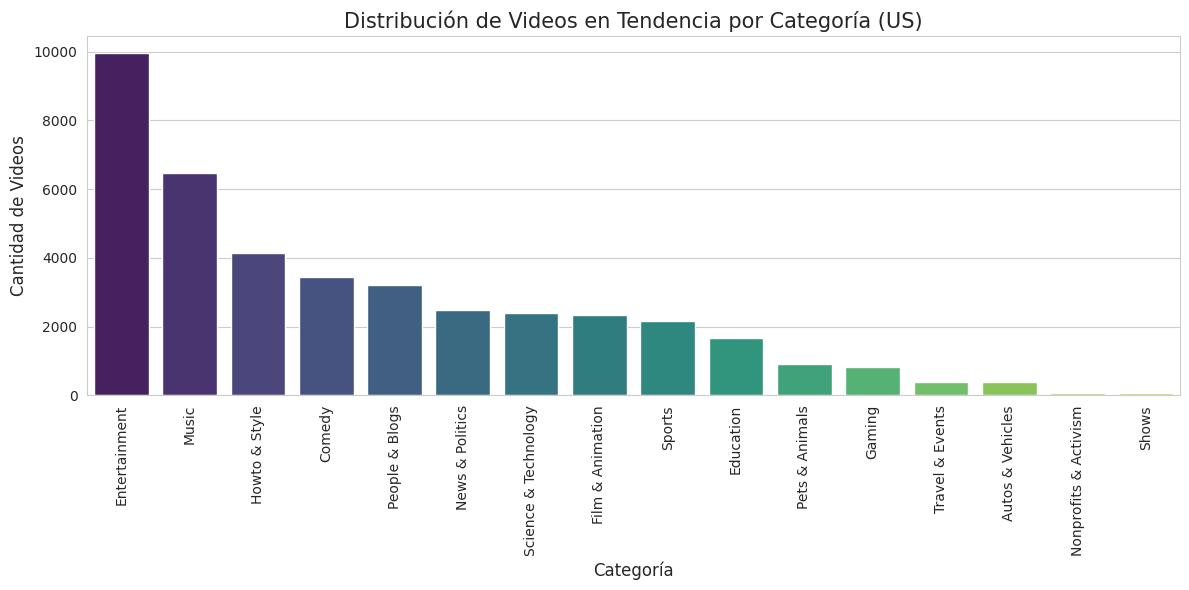

In [ ]:
#¿Cuáles son las categorías más frecuentes en Tendencias en Estados Unidos?

# Conteo de videos por categoría
conteo_categorias_us = dataUS['category_id'].value_counts()

# Mapear los IDs de categoría a los nombres usando category_dict
nombres_categorias_us = conteo_categorias_us.index.map(category_dict)

plt.figure(figsize=(12,6))
sns.barplot(x=nombres_categorias_us, y=conteo_categorias_us.values, palette="viridis")
plt.title('Distribución de Videos en Tendencia por Categoría (US)', fontsize=15)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad de Videos', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Análisis de Vistas

Q1 = dataUS['views'].quantile(0.25)
Q3 = dataUS['views'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

dataUS_cleaned = dataUS[(dataUS['views'] >= lower_bound) & (dataUS['views'] <= upper_bound) & (dataUS['views'] > 0)].copy() # Agregado .copy() aquí para evitar SettingWithCopyWarning

print(f"Q1 (Views): {Q1}")
print(f"Q3 (Views): {Q3}")
print(f"IQR (Views): {IQR}")
print(f"Límite Superior (Views): {upper_bound}")
print(f"Límite Inferior (Views): {lower_bound}")
print(f"Dimensiones del DataFrame Original: {dataUS.shape}")
print(f"Dimensiones del DataFrame Limpio (después de remover atípicos y views <= 0): {dataUS_cleaned.shape}")

Q1 (Views): 242329.0
Q3 (Views): 1823157.0
IQR (Views): 1580828.0
Límite Superior (Views): 4194399.0
Límite Inferior (Views): -2128913.0
Dimensiones del DataFrame Original: (40949, 16)
Dimensiones del DataFrame Limpio (después de remover atípicos y views <= 0): (36450, 16)


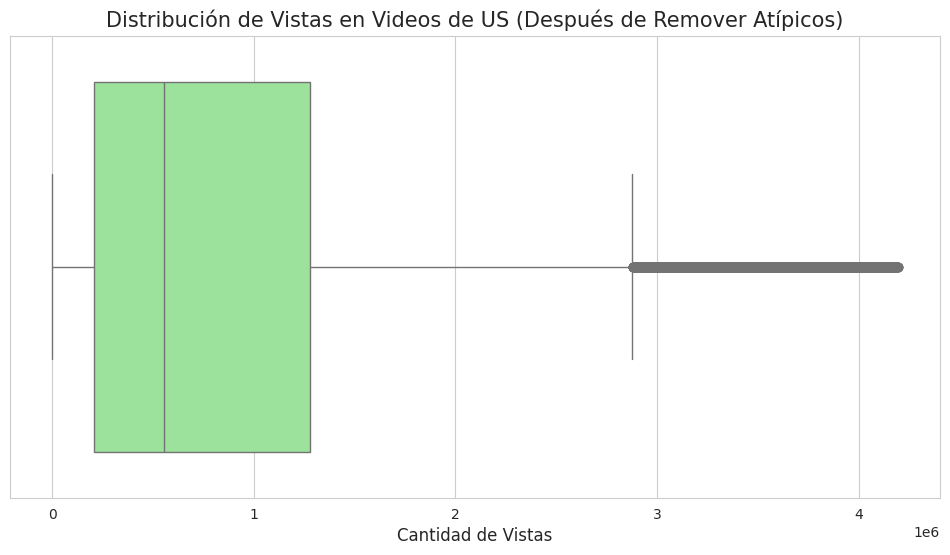

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=dataUS_cleaned['views'], color='lightgreen')
plt.title('Distribución de Vistas en Videos de US (Después de Remover Atípicos)', fontsize=15)
plt.xlabel('Cantidad de Vistas', fontsize=12)
plt.show()

In [ ]:
print("Estadísticas de Vistas en US (Antes de remover atípicos):")
print(dataUS['views'].describe().apply(lambda x: format(x, 'f')))

print("\nEstadísticas de Vistas en US (Después de remover atípicos):")
print(dataUS_cleaned['views'].describe().apply(lambda x: format(x, 'f')))

Estadísticas de Vistas en US (Antes de remover atípicos):
count        40949.000000
mean       2360784.638257
std        7394113.759704
min            549.000000
25%         242329.000000
50%         681861.000000
75%        1823157.000000
max      225211923.000000
Name: views, dtype: object

Estadísticas de Vistas en US (Después de remover atípicos):
count      36450.000000
mean      902842.416571
std       944866.807347
min          549.000000
25%       208873.250000
50%       552416.000000
75%      1276650.000000
max      4193804.000000
Name: views, dtype: object


¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

In [ ]:
##Cantidad de likes y dislikes de las categorías en promedio y ordenadas en orden descendente.
df_likes_us = dataUS_cleaned.groupby('category_id')['likes'].mean().sort_values(ascending=False).reset_index()
df_likes_us['category_name'] = df_likes_us['category_id'].map(category_dict)

print("Categorías de Videos por Promedio de Likes (US):")
display(df_likes_us[['category_name', 'likes']].head(10))

df_dislikes_us = dataUS_cleaned.groupby('category_id')['dislikes'].mean().sort_values(ascending=False).reset_index()
df_dislikes_us['category_name'] = df_dislikes_us['category_id'].map(category_dict)

print("\nCategorías de Videos por Promedio de Dislikes (US):")
display(df_dislikes_us[['category_name', 'dislikes']].head(10))

Categorías de Videos por Promedio de Likes (US):


,category_name,likes
0,Music,54984.716763
1,Gaming,54855.183308
2,Comedy,49573.269948
3,Howto & Style,36267.414141
4,People & Blogs,35052.060041
5,Film & Animation,32851.479467
6,Entertainment,26849.251982
7,Education,26547.738329
8,Science & Technology,24696.218263
9,Pets & Animals,19603.877369



Categorías de Videos por Promedio de Dislikes (US):


,category_name,dislikes
0,Gaming,2916.800298
1,People & Blogs,2154.520692
2,Comedy,1738.278202
3,News & Politics,1587.980320
4,Film & Animation,1494.051733
5,Music,1315.167202
6,Entertainment,1262.500949
7,Science & Technology,1214.795546
8,Howto & Style,1083.589800
9,Travel & Events,855.239899


¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me
gusta”?

In [ ]:
# Calcular el promedio de likes y dislikes por categoría
category_engagement = dataUS_cleaned.groupby('category_id')[['likes', 'dislikes']].mean().reset_index()

# Manejar los casos de dislikes cero para evitar división por cero. Sumar 1 para un ratio más conservador.
category_engagement['dislikes'] = category_engagement['dislikes'].apply(lambda x: x if x > 0 else 1)

# Calcular la proporción de likes/dislikes
category_engagement['like_dislike_ratio'] = category_engagement['likes'] / category_engagement['dislikes']

# Mapear los IDs de categoría a nombres legibles
category_engagement['category_name'] = category_engagement['category_id'].map(category_dict)

# Ordenar por la proporción de likes/dislikes de mayor a menor
category_engagement_sorted = category_engagement.sort_values(by='like_dislike_ratio', ascending=False)

print("Categorías de videos ordenadas por la proporción 'Me gusta' / 'No me gusta' (US):")
display(category_engagement_sorted[['category_name', 'like_dislike_ratio']])

Categorías de videos ordenadas por la proporción 'Me gusta' / 'No me gusta' (US):


,category_name,like_dislike_ratio
15,Shows,44.174922
2,Music,41.808157
3,Pets & Animals,39.971809
12,Education,34.399648
11,Howto & Style,33.469689
8,Comedy,28.518605
14,Nonprofits & Activism,24.203836
0,Film & Animation,21.988181
9,Entertainment,21.266718
13,Science & Technology,20.329527


/tmp/ipython-input-115718396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='like_dislike_ratio', y='category_name', data=category_engagement_sorted, palette='viridis')


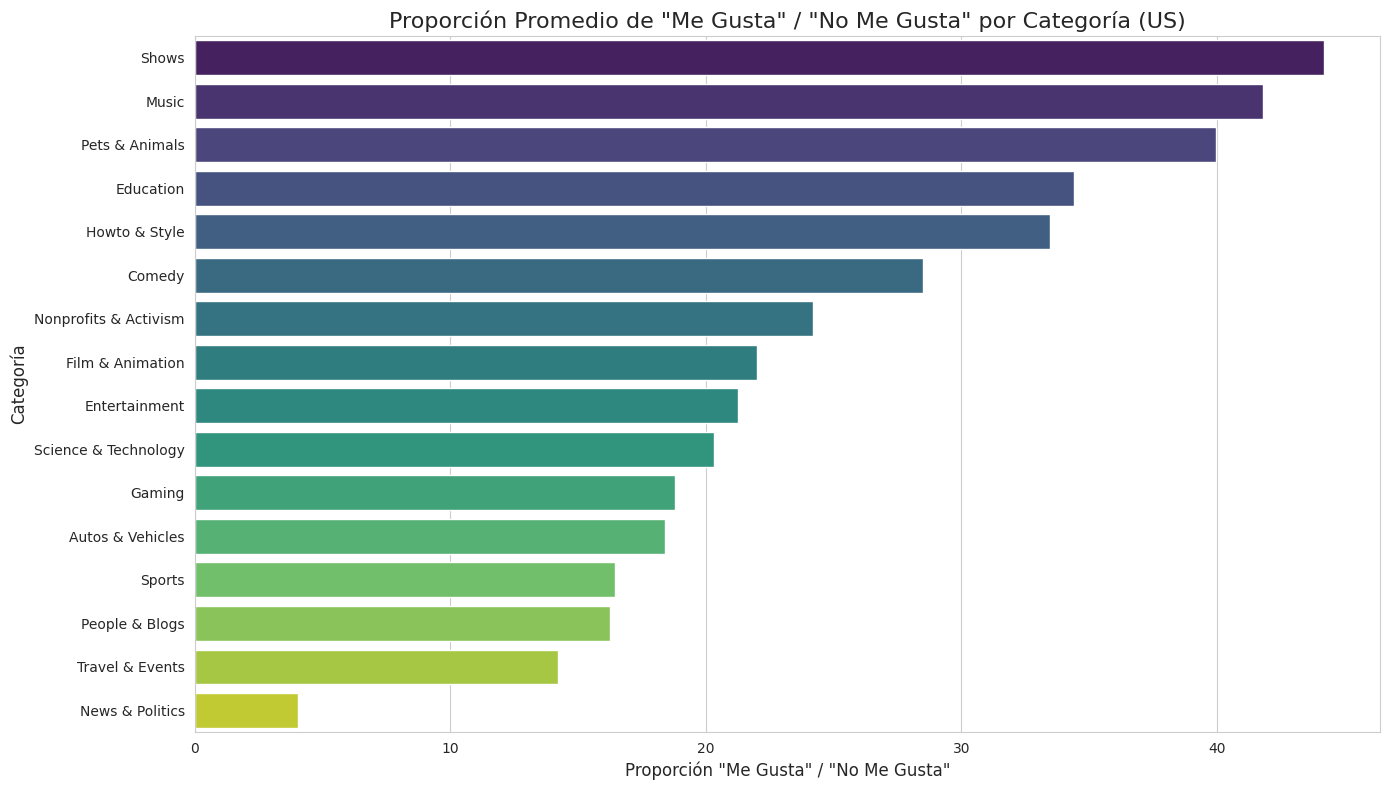

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='like_dislike_ratio', y='category_name', data=category_engagement_sorted, palette='viridis')
plt.title('Proporción Promedio de "Me Gusta" / "No Me Gusta" por Categoría (US)', fontsize=16)
plt.xlabel('Proporción "Me Gusta" / "No Me Gusta"', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.tight_layout()
plt.show()

¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /
“Comentarios”?

In [ ]:
# Calcular el promedio de vistas y comentarios por categoría
category_engagement_vc = dataUS_cleaned.groupby('category_id')[['views', 'comment_count']].mean().reset_index()

# Manejar los casos de comentarios cero para evitar división por cero. Sumar 1 para un ratio más conservador.
category_engagement_vc['comment_count'] = category_engagement_vc['comment_count'].apply(lambda x: x if x > 0 else 1)

# Calcular la proporción de vistas/comentarios
category_engagement_vc['views_comment_ratio'] = category_engagement_vc['views'] / category_engagement_vc['comment_count']

# Mapear los IDs de categoría a nombres legibles
category_engagement_vc['category_name'] = category_engagement_vc['category_id'].map(category_dict)

# Ordenar por la proporción de vistas/comentarios de mayor a menor
category_engagement_vc_sorted = category_engagement_vc.sort_values(by='views_comment_ratio', ascending=False)

print("Categorías de videos ordenadas por la proporción 'Vistas' / 'Comentarios' (US):")
display(category_engagement_vc_sorted[['category_name', 'views_comment_ratio']])

Categorías de videos ordenadas por la proporción 'Vistas' / 'Comentarios' (US):


,category_name,views_comment_ratio
15,Shows,541.449562
4,Sports,460.540066
3,Pets & Animals,297.277193
1,Autos & Vehicles,290.387026
5,Travel & Events,283.592856
2,Music,279.120866
9,Entertainment,276.307611
14,Nonprofits & Activism,273.107730
13,Science & Technology,255.208834
7,People & Blogs,246.777699


/tmp/ipython-input-2387318127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views_comment_ratio', y='category_name', data=category_engagement_vc_sorted, palette='magma')


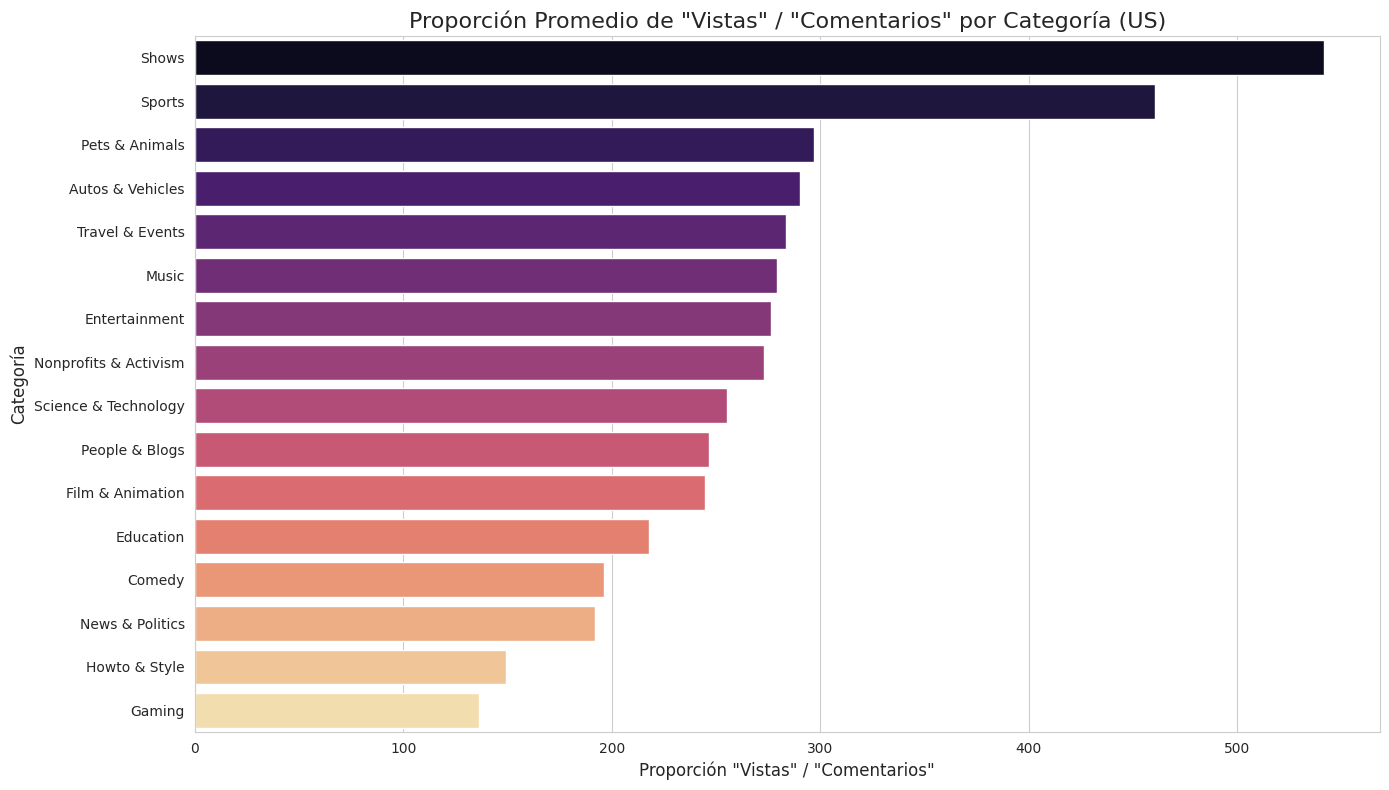

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='views_comment_ratio', y='category_name', data=category_engagement_vc_sorted, palette='magma')
plt.title('Proporción Promedio de "Vistas" / "Comentarios" por Categoría (US)', fontsize=16)
plt.xlabel('Proporción "Vistas" / "Comentarios"', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.tight_layout()
plt.show()

 Volumen de Videos en Tendencia a lo Largo del Tiempo (US)

In [ ]:
# Convertir la columna 'trending_date' a formato de fecha
# El formato original es 'YY.DD.MM' (e.g., '17.14.11' para 14 de Noviembre de 2017)
dataUS_cleaned['trending_date_parsed'] = pd.to_datetime(dataUS_cleaned['trending_date'], format='%y.%d.%m')

# Contar el número de videos en tendencia por cada día
volumen_tendencia_diario_us = dataUS_cleaned['trending_date_parsed'].value_counts().sort_index()

print("Volumen de videos en tendencia por día (US):")
display(volumen_tendencia_diario_us.head())

Volumen de videos en tendencia por día (US):


,count
trending_date_parsed,
2017-11-14,194
2017-11-15,193
2017-11-16,191
2017-11-17,191
2017-11-18,189


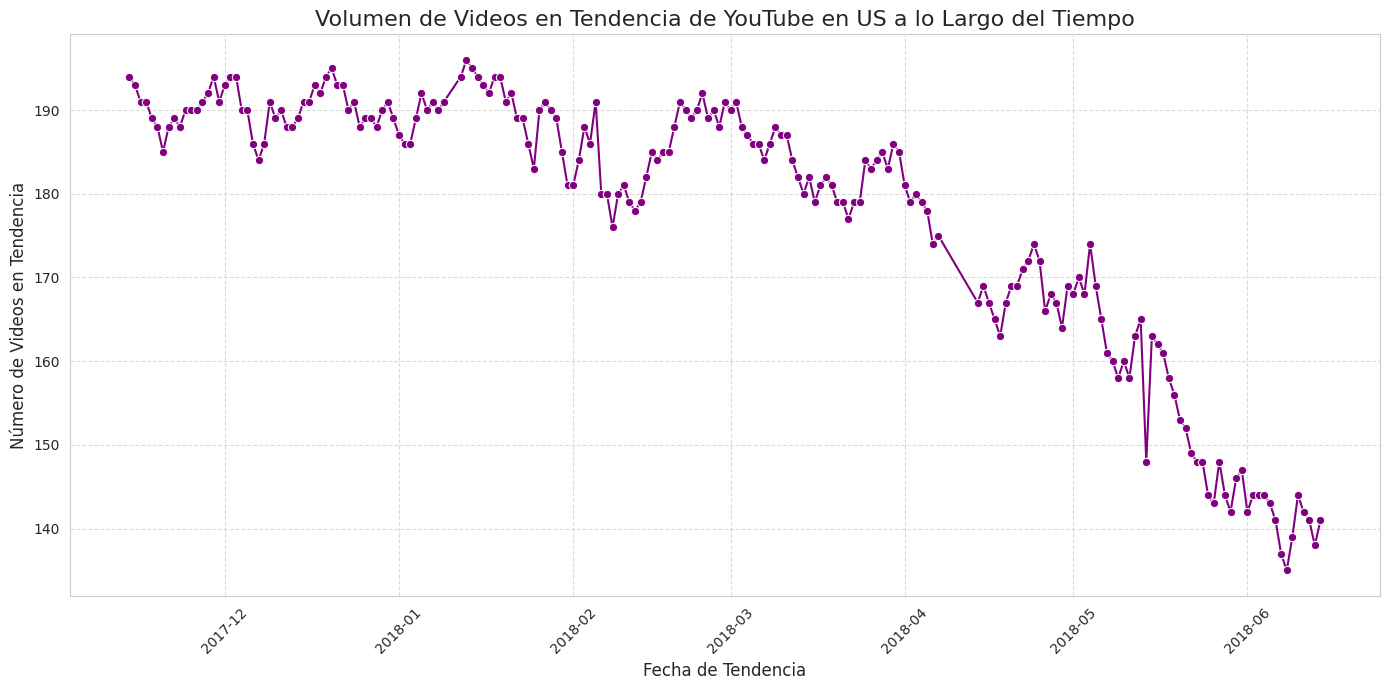

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=volumen_tendencia_diario_us.index, y=volumen_tendencia_diario_us.values, marker='o', color='purple')
plt.title('Volumen de Videos en Tendencia de YouTube en US a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha de Tendencia', fontsize=12)
plt.ylabel('Número de Videos en Tendencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos
frecuencia?

In [ ]:
# Contar la frecuencia de cada canal en tendencia
conteo_canales_us = dataUS_cleaned['channel_title'].value_counts()

print("\nCanales de YouTube más frecuentes en tendencia (US):")
display(conteo_canales_us.head(10))

print("\nCanales de YouTube menos frecuentes en tendencia (US):")
display(conteo_canales_us.tail(10))


Canales de YouTube más frecuentes en tendencia (US):


,count
channel_title,
ESPN,203
Vox,193
TheEllenShow,188
The Late Show with Stephen Colbert,187
Netflix,186
Late Night with Seth Meyers,183
NBA,181
CNN,180
Screen Junkies,177



Canales de YouTube menos frecuentes en tendencia (US):


,count
channel_title,
revlon,1
Dean Anderson,1
Frankie Vision,1
Mason Ramsey,1
Kanye West,1
RiceGum,1
FifthHarmonyVEVO,1
ZaynVEVO,1
Walt Disney Animation Studios,1


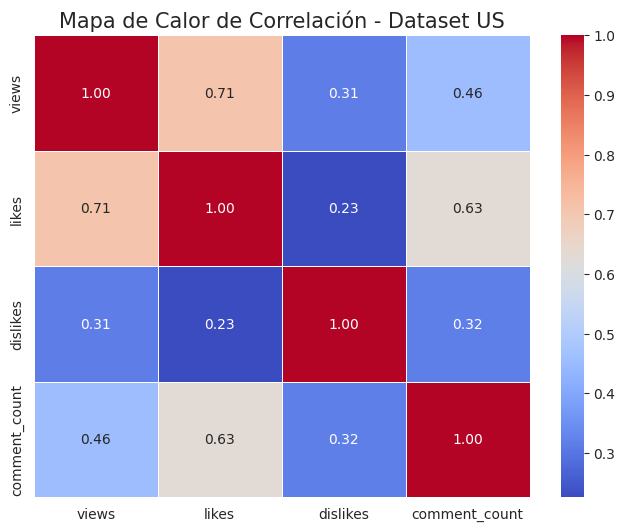

In [ ]:
#Relación entre Vistas, Likes y Comentarios

cols_interes = ['views', 'likes', 'dislikes', 'comment_count']
matriz_correlacion = dataUS_cleaned[cols_interes].corr()

plt.figure(figsize=(8,6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mapa de Calor de Correlación - Dataset US', fontsize=15)
plt.show()

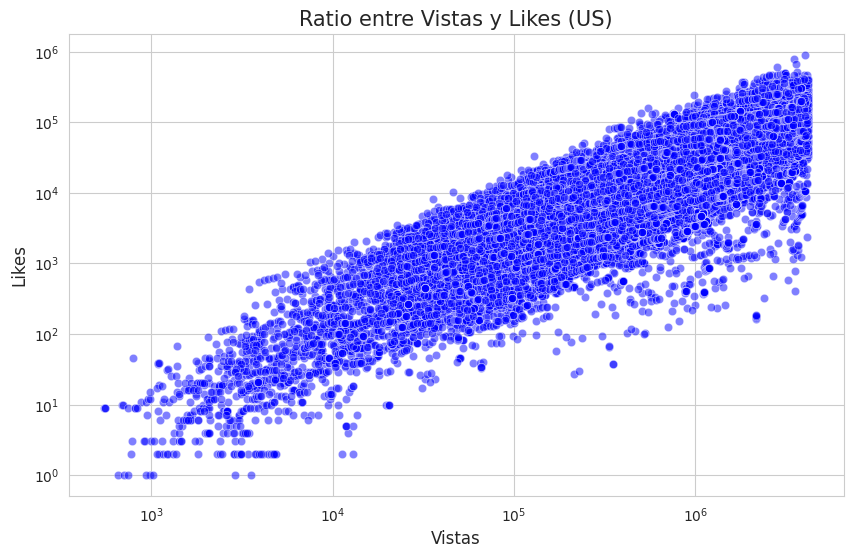

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataUS_cleaned, x='views', y='likes', alpha=0.5, color='blue')
plt.title('Ratio entre Vistas y Likes (US)', fontsize=15)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Likes', fontsize=12)

# Opcional: Usar escala logarítmica si los datos están muy dispersos (común en YouTube)
plt.xscale('log')
plt.yscale('log')

###Análisis de CA

In [ ]:
# ANÁLISIS PARA CANADÁ

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

¿Qué categorías de videos son las de mayor tendencia?

/tmp/ipython-input-536296257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_categorias_ca, y=conteo_categorias_ca.values, palette="plasma")


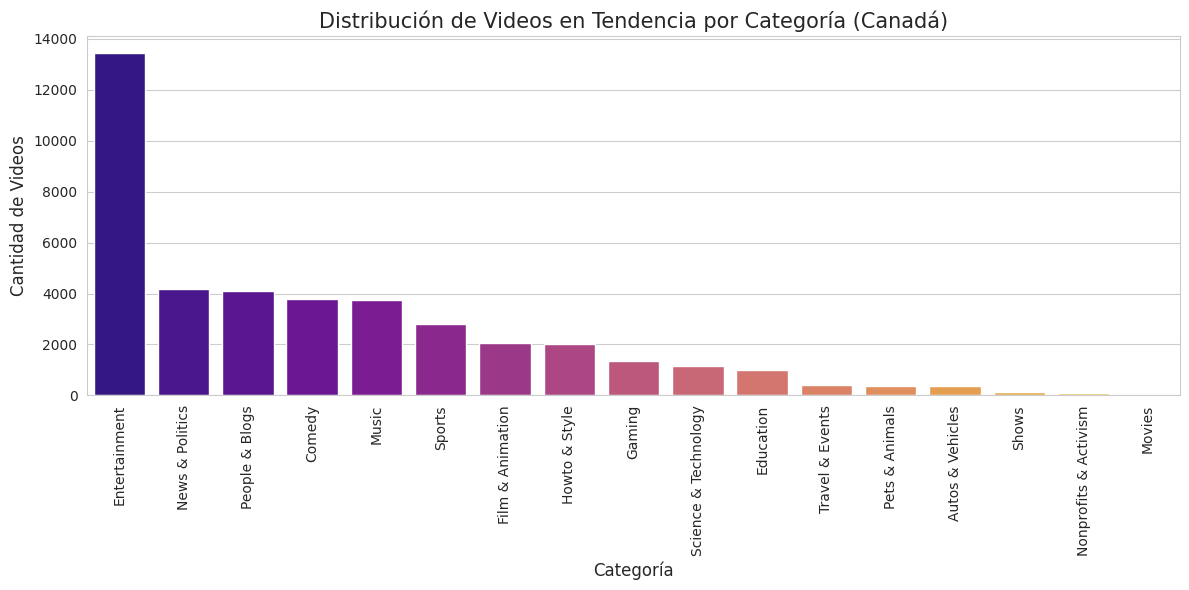

In [ ]:
# Conteo de videos por categoría para Canadá
conteo_categorias_ca = dataCA['category_id'].value_counts()

# Mapear los IDs a nombres
nombres_categorias_ca = conteo_categorias_ca.index.map(category_dict)

# Crear el gráfico
plt.figure(figsize=(12,6))
sns.barplot(x=nombres_categorias_ca, y=conteo_categorias_ca.values, palette="plasma")

plt.title('Distribución de Videos en Tendencia por Categoría (Canadá)', fontsize=15)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad de Videos', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# ANÁLISIS DE VISTAS ---

Q1_ca = dataCA['views'].quantile(0.25)
Q3_ca = dataCA['views'].quantile(0.75)
IQR_ca = Q3_ca - Q1_ca

upper_bound_ca = Q3_ca + 1.5 * IQR_ca
lower_bound_ca = Q1_ca - 1.5 * IQR_ca

dataCA_cleaned = dataCA[(dataCA['views'] >= lower_bound_ca) &
                        (dataCA['views'] <= upper_bound_ca) &
                        (dataCA['views'] > 0)].copy()

print(f"--- Estadísticas Canadá ---")
print(f"Q1 (Views): {Q1_ca}")
print(f"Q3 (Views): {Q3_ca}")
print(f"IQR (Views): {IQR_ca}")
print(f"Límite Superior (Views): {upper_bound_ca}")
print(f"Dimensiones Originales: {dataCA.shape}")
print(f"Dimensiones Limpias: {dataCA_cleaned.shape}")

--- Estadísticas Canadá ---
Q1 (Views): 143902.0
Q3 (Views): 963302.0
IQR (Views): 819400.0
Límite Superior (Views): 2192402.0
Dimensiones Originales: (40881, 16)
Dimensiones Limpias: (36417, 16)


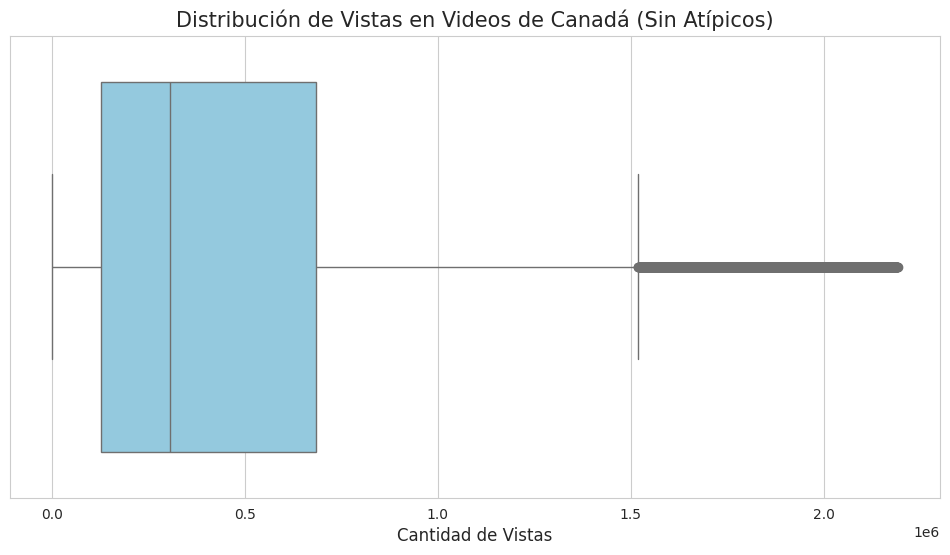

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=dataCA_cleaned['views'], color='skyblue')
plt.title('Distribución de Vistas en Videos de Canadá (Sin Atípicos)', fontsize=15)
plt.xlabel('Cantidad de Vistas', fontsize=12)
plt.show()

In [ ]:
print("\nEstadísticas Originales (CA):")
print(dataCA['views'].describe().apply(lambda x: format(x, 'f')))
print("\nEstadísticas Limpias (CA):")
print(dataCA_cleaned['views'].describe().apply(lambda x: format(x, 'f')))


Estadísticas Originales (CA):
count        40881.000000
mean       1147035.910790
std        3390913.022309
min            733.000000
25%         143902.000000
50%         371204.000000
75%         963302.000000
max      137843120.000000
Name: views, dtype: object

Estadísticas Limpias (CA):
count      36417.000000
mean      487115.254359
std       490213.212896
min          733.000000
25%       127775.000000
50%       306409.000000
75%       684236.000000
max      2191499.000000
Name: views, dtype: object


¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

In [ ]:
# Promedio de LIKES por categoría (Orden Descendente)
df_likes_ca = dataCA_cleaned.groupby('category_id')['likes'].mean().sort_values(ascending=False).reset_index()

df_likes_ca['category_name'] = df_likes_ca['category_id'].map(category_dict)

print("Categorías de Videos por Promedio de Likes (Canadá)")
display(df_likes_ca[['category_name', 'likes']].head(10))


# Promedio de DISLIKES por categoría (Orden Descendente)
df_dislikes_ca = dataCA_cleaned.groupby('category_id')['dislikes'].mean().sort_values(ascending=False).reset_index()

df_dislikes_ca['category_name'] = df_dislikes_ca['category_id'].map(category_dict)

print("\nCategorías de Videos por Promedio de Dislikes (Canadá)")
display(df_dislikes_ca[['category_name', 'dislikes']].head(10))

Categorías de Videos por Promedio de Likes (Canadá)


,category_name,likes
0,Music,37446.400740
1,Comedy,31796.606088
2,Science & Technology,28056.494340
3,Gaming,26757.311570
4,Howto & Style,20273.840022
5,Film & Animation,18166.447025
6,Pets & Animals,17544.696532
7,Nonprofits & Activism,17039.937500
8,Education,16556.902413
9,Movies,15681.500000



Categorías de Videos por Promedio de Dislikes (Canadá)


,category_name,dislikes
0,Nonprofits & Activism,4288.640625
1,Music,1010.389642
2,Shows,971.258065
3,Science & Technology,879.900943
4,Comedy,816.592659
5,Gaming,795.340496
6,People & Blogs,773.495866
7,Education,640.031480
8,Film & Animation,633.071388
9,News & Politics,621.653399


¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

In [ ]:
# Calcular el promedio de likes y dislikes por categoría
category_engagement_ca = dataCA_cleaned.groupby('category_id')[['likes', 'dislikes']].mean().reset_index()

# Manejar casos de dislikes cero (evitar división por cero)
category_engagement_ca['dislikes'] = category_engagement_ca['dislikes'].apply(lambda x: x if x > 0 else 1)

# Calcular el Ratio
category_engagement_ca['like_dislike_ratio'] = category_engagement_ca['likes'] / category_engagement_ca['dislikes']

# Mapear los IDs a Nombres de Categoría
category_engagement_ca['category_name'] = category_engagement_ca['category_id'].map(category_dict)

# Ordenar de mayor a menor ratio
category_engagement_ca_sorted = category_engagement_ca.sort_values(by='like_dislike_ratio', ascending=False)

# Mostrar tabla de datos
print("Categorías con mejor proporción 'Me gusta' / 'No me gusta' (Canadá)")
display(category_engagement_ca_sorted[['category_name', 'like_dislike_ratio']].head(10))

Categorías con mejor proporción 'Me gusta' / 'No me gusta' (Canadá)


,category_name,like_dislike_ratio
3,Pets & Animals,49.226905
11,Howto & Style,39.235956
8,Comedy,38.938148
2,Music,37.061347
6,Gaming,33.642587
5,Travel & Events,32.371720
13,Science & Technology,31.885969
15,Movies,31.206965
1,Autos & Vehicles,29.285442
0,Film & Animation,28.695732


/tmp/ipython-input-4125103295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='like_dislike_ratio', y='category_name', data=category_engagement_ca_sorted, palette='coolwarm')


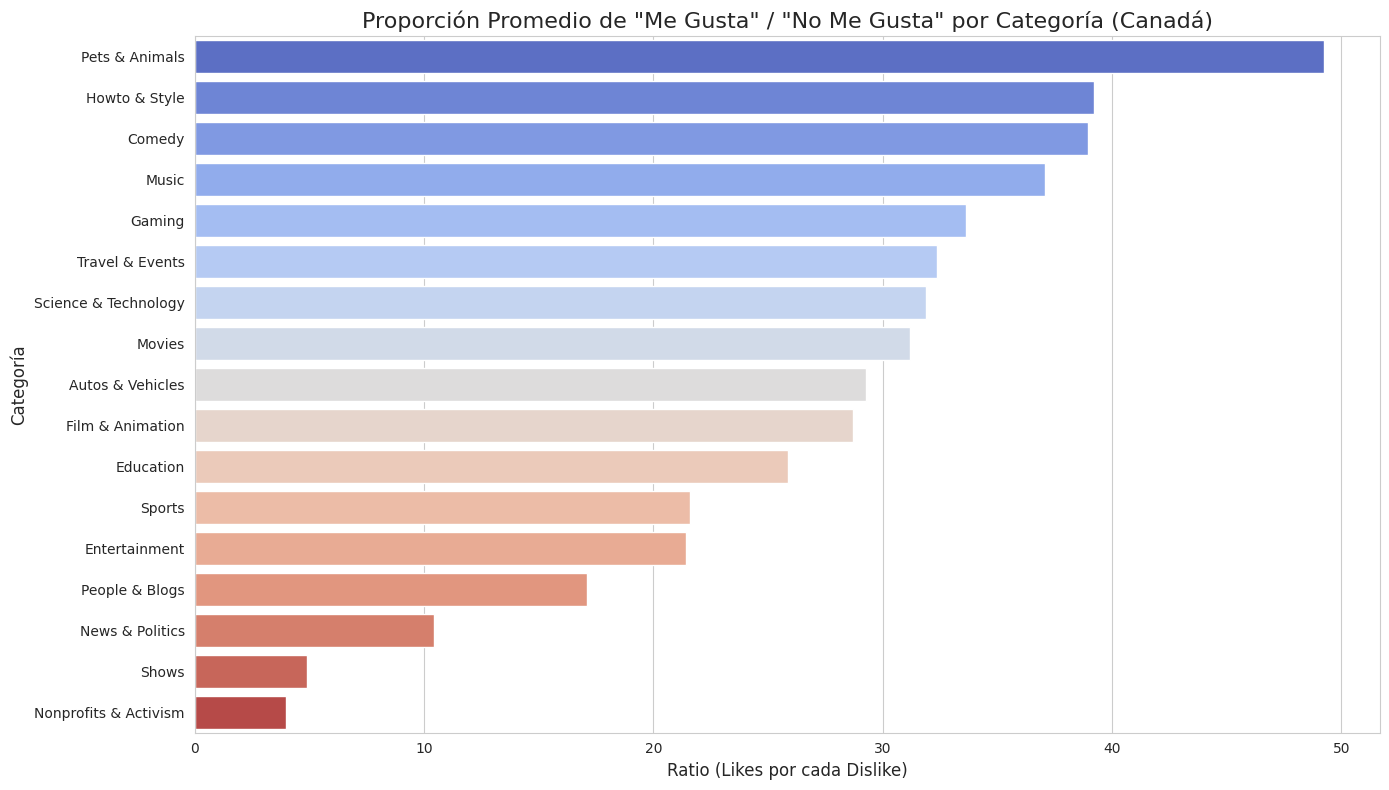

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='like_dislike_ratio', y='category_name', data=category_engagement_ca_sorted, palette='coolwarm')
plt.title('Proporción Promedio de "Me Gusta" / "No Me Gusta" por Categoría (Canadá)', fontsize=16)
plt.xlabel('Ratio (Likes por cada Dislike)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.tight_layout()
plt.show()

¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

In [ ]:
# Calcular el promedio de vistas y comentarios por categoría
category_engagement_vc_ca = dataCA_cleaned.groupby('category_id')[['views', 'comment_count']].mean().reset_index()

# Manejar casos de comentarios cero
category_engagement_vc_ca['comment_count'] = category_engagement_vc_ca['comment_count'].apply(lambda x: x if x > 0 else 1)

# Calcular el Ratio
category_engagement_vc_ca['views_comment_ratio'] = category_engagement_vc_ca['views'] / category_engagement_vc_ca['comment_count']

# Mapear los IDs de categoría a nombres
category_engagement_vc_ca['category_name'] = category_engagement_vc_ca['category_id'].map(category_dict)

# Ordenar de mayor a menor ratio
category_engagement_vc_ca_sorted = category_engagement_vc_ca.sort_values(by='views_comment_ratio', ascending=False)

# Mostrar tabla
print("Categorías de videos ordenadas por ratio 'Vistas / Comentarios' (Canadá)")
display(category_engagement_vc_ca_sorted[['category_name', 'views_comment_ratio']].head(10))

Categorías de videos ordenadas por ratio 'Vistas / Comentarios' (Canadá)


,category_name,views_comment_ratio
16,Shows,926.291159
15,Movies,656.782920
4,Sports,363.570804
2,Music,233.141249
9,Entertainment,225.471636
7,People & Blogs,206.921322
5,Travel & Events,206.915436
0,Film & Animation,204.546368
8,Comedy,179.731696
12,Education,178.249524


/tmp/ipython-input-2822656840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views_comment_ratio', y='category_name', data=category_engagement_vc_ca_sorted, palette='plasma')


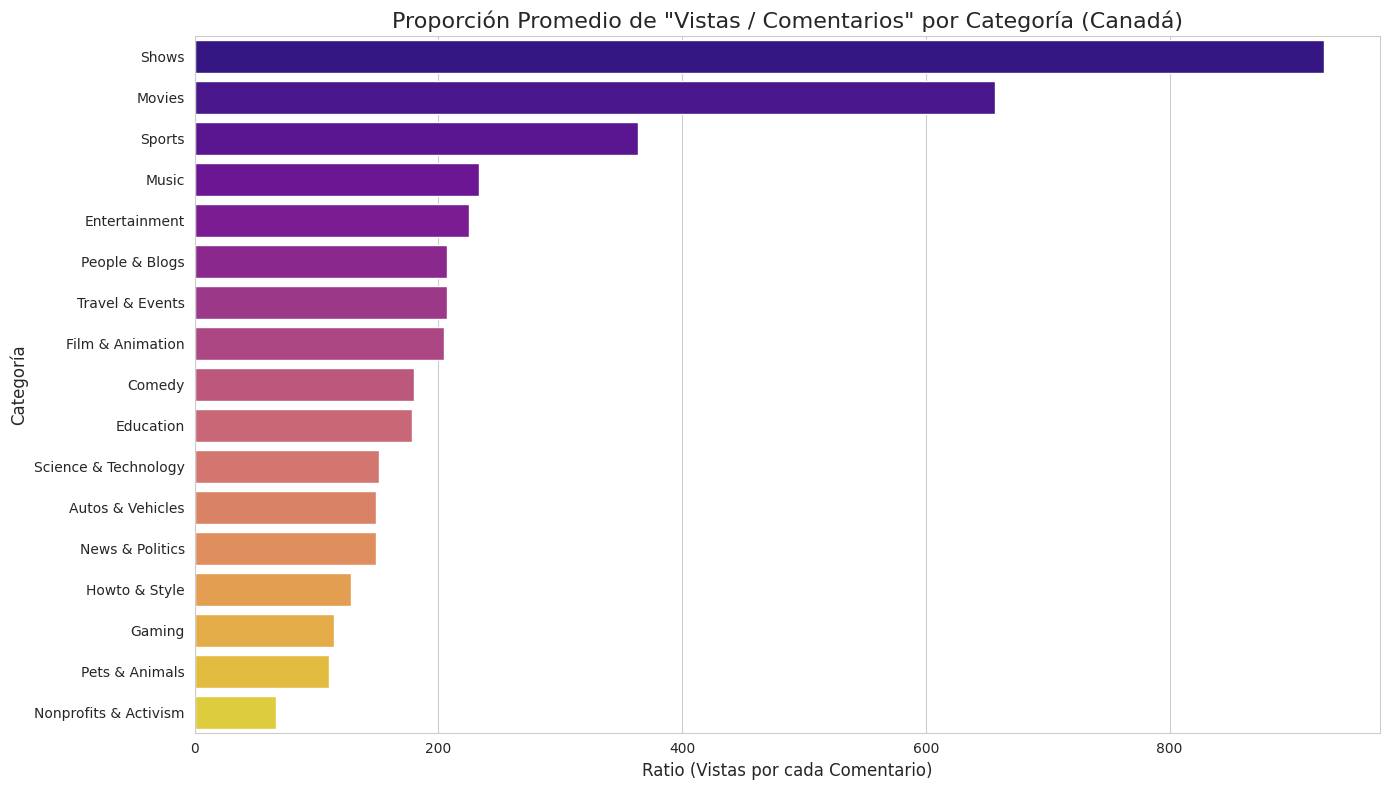

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='views_comment_ratio', y='category_name', data=category_engagement_vc_ca_sorted, palette='plasma')

plt.title('Proporción Promedio de "Vistas / Comentarios" por Categoría (Canadá)', fontsize=16)
plt.xlabel('Ratio (Vistas por cada Comentario)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.tight_layout()
plt.show()

¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

In [ ]:
# Convertir la columna 'trending_date' a formato de fecha
dataCA_cleaned['trending_date_parsed'] = pd.to_datetime(dataCA_cleaned['trending_date'], format='%y.%d.%m')

# Contar el número de videos en tendencia por cada día
volumen_tendencia_diario_ca = dataCA_cleaned['trending_date_parsed'].value_counts().sort_index()

# Mostrar los primeros registros para verificar
print("Volumen de videos en tendencia por día (Canadá)")
display(volumen_tendencia_diario_ca.head())

Volumen de videos en tendencia por día (Canadá)


,count
trending_date_parsed,
2017-11-14,179
2017-11-15,178
2017-11-16,180
2017-11-17,181
2017-11-18,176


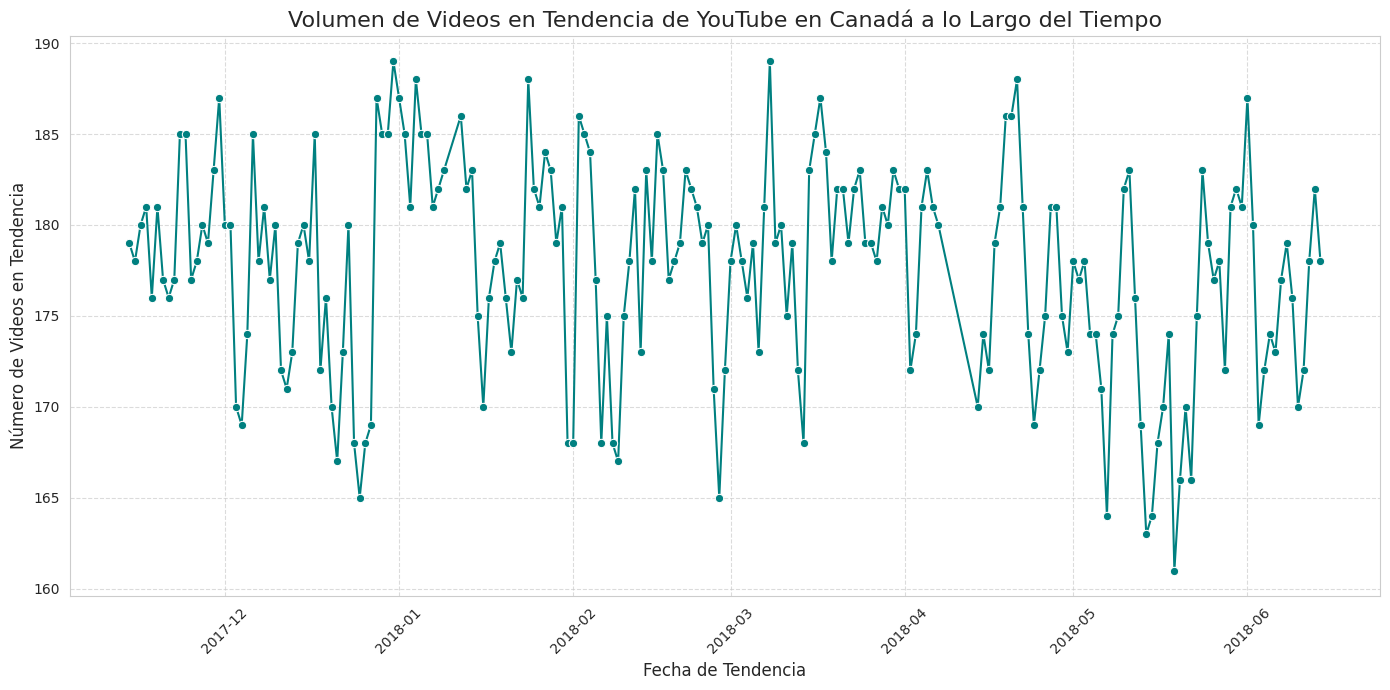

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=volumen_tendencia_diario_ca.index, y=volumen_tendencia_diario_ca.values, marker='o', color='teal')
plt.title('Volumen de Videos en Tendencia de YouTube en Canadá a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha de Tendencia', fontsize=12)
plt.ylabel('Número de Videos en Tendencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45) # Rotar fechas para mejor lectura
plt.tight_layout()
plt.show()

¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos
frecuencia?

In [ ]:
# Contar la frecuencia de cada canal en el dataset limpio de Canadá
conteo_canales_ca = dataCA_cleaned['channel_title'].value_counts()

# Mostrar los más frecuentes
print("\nCanales de YouTube más frecuentes en tendencia (Canadá)")
display(conteo_canales_ca.head(10))

# Mostrar los menos frecuentes
print("\nCanales de YouTube menos frecuentes en tendencia (Canadá)")
display(conteo_canales_ca.tail(10))


Canales de YouTube más frecuentes en tendencia (Canadá)


,count
channel_title,
SET India,192
MSNBC,189
The Young Turks,186
VikatanTV,182
REACT,181
CNN,179
FBE,178
ARY Digital,168
RadaanMedia,168



Canales de YouTube menos frecuentes en tendencia (Canadá)


,count
channel_title,
AFP news agency,1
é­å¯¶åæ¿è«,1
lHeadHunterl,1
Dr Bot,1
Ella bell,1
XXL,1
Strange incident,1
Kelly Drian,1
savage.,1


¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?



In [ ]:
# Falta info del estado, no?

¿Los videos en tendencia son los que mayor cantidad de comentarios positivos
reciben?

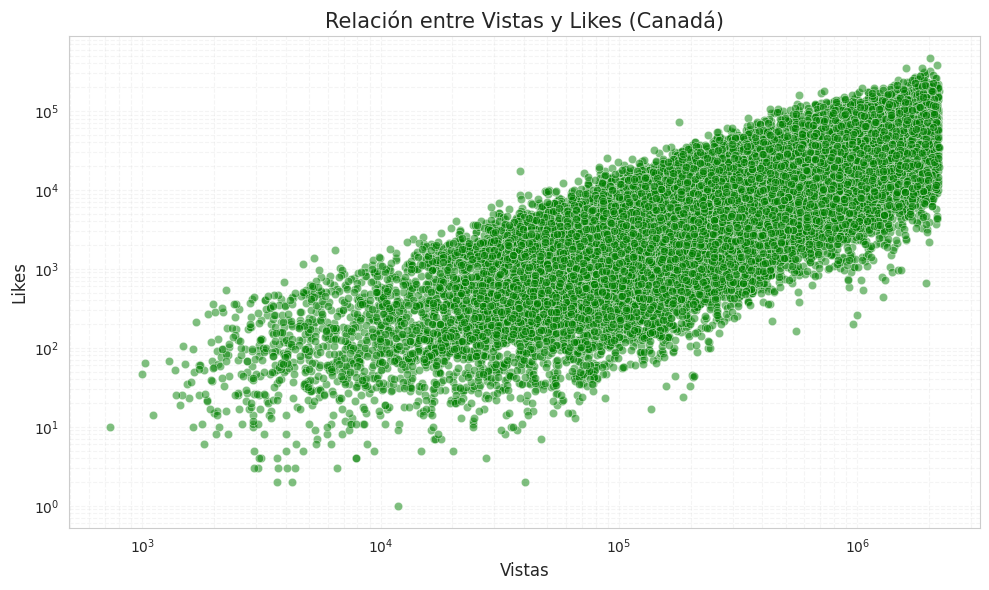

Coeficiente de correlación Vistas-Likes (Canadá): 0.66


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataCA_cleaned, x='views', y='likes', alpha=0.5, color='green')
plt.title('Relación entre Vistas y Likes (Canadá)', fontsize=15)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Likes', fontsize=12)

plt.xscale('log')
plt.yscale('log')

plt.grid(True, which="both", ls="--", alpha=0.2)
plt.tight_layout()
plt.show()

correlacion_ca = dataCA_cleaned['views'].corr(dataCA_cleaned['likes'])
print(f"Coeficiente de correlación Vistas-Likes (Canadá): {correlacion_ca:.2f}")

¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

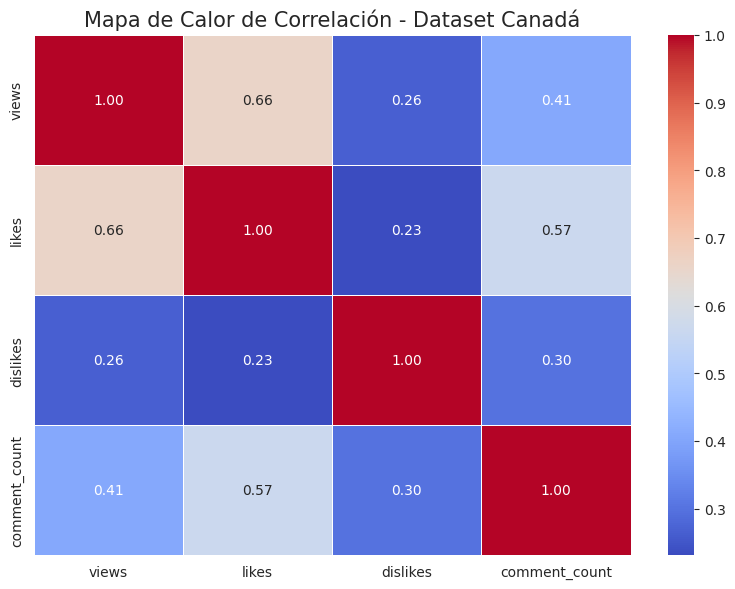

In [ ]:
cols_interes = ['views', 'likes', 'dislikes', 'comment_count']
matriz_correlacion_ca = dataCA_cleaned[cols_interes].corr()
plt.figure(figsize=(8,6))
sns.heatmap(matriz_correlacion_ca, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mapa de Calor de Correlación - Dataset Canadá', fontsize=15)
plt.tight_layout()
plt.show()